In [100]:
import pandas as pd

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
import seaborn as sns

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
import matplotlib.pyplot as plt

In [106]:
from sklearn.neural_network import MLPClassifier

In [107]:
# Definujte cestu k CSV súboru s datasetom Iris
songs_dataset = "zadanie1_dataset.csv"

# Načítajte dataset s použitím Pandas
df = pd.read_csv(songs_dataset)

In [108]:
emotions = ['calm', 'energetic', 'happy', 'sad']

In [109]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'popularity', 'number_of_artists', 'explicit', 'name', 'url', 'genres',
       'filtered_genres', 'top_genre', 'emotion'],
      dtype='object')

In [110]:
columns_to_remove = ['name', 'url', 'genres', 'filtered_genres', 'duration_ms']
df_without_specified_columns = df.drop(columns=columns_to_remove)

In [111]:
# vymazanie outlierov pomocou setnutia hodnot(dole v zadani)
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['danceability'] >= 0.0) & (df_without_specified_columns['danceability'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['energy'] >= 0.0) & (df_without_specified_columns['energy'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['loudness'] >= -60) & (df_without_specified_columns['loudness'] <= 0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['speechiness'] >= 0.0) & (df_without_specified_columns['speechiness'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['acousticness'] >= 0.0) & (df_without_specified_columns['acousticness'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['instrumentalness'] >= 0.0) & (df_without_specified_columns['instrumentalness'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['liveness'] >= 0.0) & (df_without_specified_columns['liveness'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['liveness'] >= 0.0) & (df_without_specified_columns['liveness'] <= 1.0)]
df_without_specified_columns = df_without_specified_columns[(df_without_specified_columns['popularity'] >= 0.0) & (df_without_specified_columns['popularity'] <= 100.0)]

In [112]:
# odstranenie null hodnot
df_without_specified_columns = df_without_specified_columns.dropna(how='any')

df_without_specified_columns.isnull().sum().sum()

0

In [113]:
df_without_specified_columns.dtypes


danceability         float64
energy               float64
loudness             float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
popularity           float64
number_of_artists    float64
explicit                bool
top_genre             object
emotion               object
dtype: object

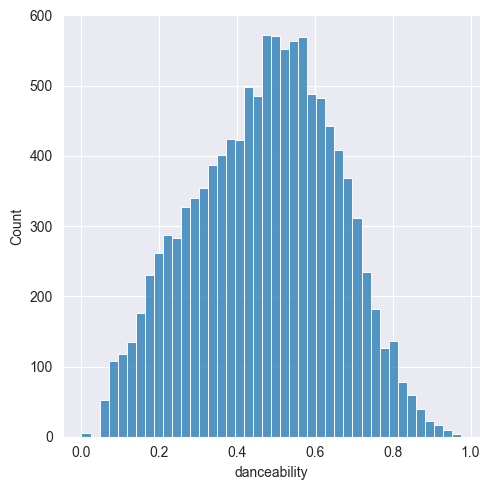

In [114]:
sns.displot(df_without_specified_columns['danceability'])

<Axes: >

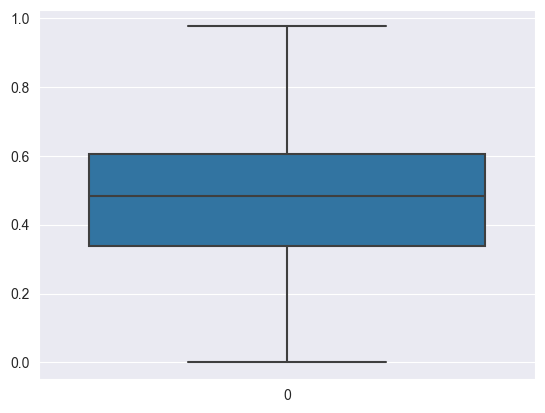

In [115]:
sns.boxplot(df_without_specified_columns['danceability'])

In [116]:
# zakodovanie stlpca EXPLICIT cez zmenu data type
df_without_specified_columns["explicit"] = df_without_specified_columns["explicit"].astype(int)

df_without_specified_columns["explicit"]

0        0
1        0
2        1
3        0
4        0
        ..
11955    0
11956    0
11957    0
11958    0
11959    0
Name: explicit, Length: 11537, dtype: int32

In [117]:
#One-Hot encodeing pre top-genre
temp = list(df_without_specified_columns["top_genre"].unique())

df_ohwd = pd.get_dummies(df_without_specified_columns, columns=['top_genre'], prefix='', prefix_sep='')

for i in temp:
    df_ohwd[i] = df_ohwd[i].astype(int)
    
df_ohwd


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,...,metalcore,opera,pop,punk,reggaeton,rock,rockabilly,ska,sleep,soul
0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,34.0,...,0,0,0,0,0,0,0,0,0,0
1,0.744,0.816,-3.933,0.0372,0.1440,0.000009,0.0902,0.748,120.062,52.0,...,0,0,0,0,0,0,0,0,0,0
2,0.721,0.768,-4.371,0.0685,0.2100,0.008430,0.2620,0.468,124.076,45.0,...,0,0,0,0,0,0,0,0,0,0
3,0.700,0.782,-4.631,0.0542,0.4490,0.000000,0.1430,0.680,124.969,46.0,...,0,0,0,0,0,0,0,0,0,0
4,0.764,0.587,-7.002,0.0298,0.0721,0.000006,0.0940,0.494,89.980,45.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,0.442,0.379,-12.711,0.0264,0.9610,0.000567,0.2840,0.659,79.948,0.0,...,0,0,0,0,0,0,0,0,0,0
11956,0.485,0.226,-10.503,0.0278,0.9820,0.000000,0.0960,0.508,139.543,0.0,...,0,0,0,0,0,0,0,0,0,0
11957,0.741,0.338,-8.488,0.0432,0.9300,0.000001,0.1640,0.804,133.504,0.0,...,0,0,0,0,0,0,0,0,0,0
11958,0.493,0.773,-5.875,0.0452,0.4560,0.000003,0.1070,0.478,140.998,0.0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
#label encodeing pre emotion spravit 
# Vytvorenie inštancie LabelEncoder
label_encoder = LabelEncoder()

# Fit a transform na stĺpec `top_genre`
df_ohwd['emotion'] = label_encoder.fit_transform(df_ohwd['emotion'])
df_ohwd['emotion']

0        2
1        2
2        1
3        2
4        2
        ..
11955    3
11956    3
11957    3
11958    3
11959    2
Name: emotion, Length: 11537, dtype: int32

In [119]:
df_ohwd.isnull().sum().sum()

0

In [120]:
# Rozdelenie dát do trénovacej (X_train, y_train), validačnej (X_val, y_val) a testovacej (X_test, y_test) množiny.
# 'X' sú vstupné stĺpce a 'Y' je výstupný stĺpec.
X = df_ohwd.drop(columns=['emotion']) #v x nesmie byt emotion,
y = df_ohwd['emotion']#  ale v y musi byt emotion, 

# Rozdelenie dát na trénovaciu, validačnú a testovaciu množinu 8:1:1
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [121]:
# Zobrazenie tvaru (počtu riadkov a stľpcov) trénovacej množiny
print("Tvar trénovacej množiny X_train:", X_train.shape)
print("Tvar trénovacej množiny y_train:", y_train.shape)

# Zobrazenie tvaru validačnej množiny
print("Tvar validačnej množiny X_val:", X_val.shape)
print("Tvar validačnej množiny y_val:", y_val.shape)

# Zobrazenie tvaru testovacej množiny
print("Tvar testovacej množiny X_test:", X_test.shape)
print("Tvar testovacej množiny y_test:", y_test.shape)

Tvar trénovacej množiny X_train: (9229, 44)
Tvar trénovacej množiny y_train: (9229,)
Tvar validačnej množiny X_val: (1154, 44)
Tvar validačnej množiny y_val: (1154,)
Tvar testovacej množiny X_test: (1154, 44)
Tvar testovacej množiny y_test: (1154,)


In [122]:
# Vytvorenie a nastavenie scaleru na trénovacie dáta
scaler = MinMaxScaler()
scaler.fit(X_train)

# Normalizácia trénovacích dát
X_train_normalized = scaler.transform(X_train)

# Použitie toho istého scaleru na validačné dáta a testovacie dáta
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

In [123]:
print(X_val_normalized)
print(X_test_normalized)

[[0.45846154 0.96597979 0.91402009 ... 0.         0.         0.        ]
 [0.24717949 0.19051917 0.59683693 ... 0.         0.         0.        ]
 [0.88205128 0.76185854 0.95539645 ... 0.         0.         0.        ]
 ...
 [0.31794872 0.82789777 0.86138064 ... 0.         0.         0.        ]
 [0.4174359  0.92595602 0.91500321 ... 0.         0.         0.        ]
 [0.41230769 0.02982372 0.48783928 ... 0.         0.         0.        ]]
[[0.54871795 0.9289578  0.92164993 ... 0.         0.         0.        ]
 [0.53128205 0.30358633 0.64274418 ... 0.         1.         0.        ]
 [0.50974359 0.69581932 0.780701   ... 0.         0.         0.        ]
 ...
 [0.58666667 0.83490193 0.87251549 ... 0.         0.         0.        ]
 [0.50974359 0.97698633 0.78172686 ... 0.         0.         0.        ]
 [0.74153846 0.87992868 0.91384911 ... 0.         0.         0.        ]]


In [124]:
# Vytvorenie a nastavenie jednoduchej neurónovej siete pre klasifikáciu
model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=100, random_state=42)

# Trénovanie modelu na trénovacích dátach
model.fit(X_train_normalized, y_train)

# Predikcia na validačných dátach
y_val_pred = model.predict(X_val_normalized)

C:\Users\boetf\Desktop\Vyska - skripta\ING\4.rocnik\zimny semester\SUNS\SUNS-zadanie-1\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [125]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train_normalized)
y_test_pred = model.predict(X_test_normalized)

accuracy_train = accuracy_score(y_train, y_train_pred) 
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Úspešnosť na trénovacej množine:", accuracy_train)
print("Úspešnosť na testovacej množine:", accuracy_test)


Úspešnosť na trénovacej množine: 0.8860114855347275
Úspešnosť na testovacej množine: 0.8821490467937608


In [126]:
from sklearn.metrics import confusion_matrix

confusion_train = confusion_matrix(y_train, y_train_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

print("Konfúzna matica na trénovacej množine:\n", confusion_train)
print("Konfúzna matica na testovacej množine:\n", confusion_test)


Konfúzna matica na trénovacej množine:
 [[2062    0    8   56]
 [   1 1960  184   27]
 [   7  204 2241  178]
 [  90   57  240 1914]]
Konfúzna matica na testovacej množine:
 [[264   0   1  12]
 [  0 237  17   1]
 [  0  36 283  25]
 [  8   7  29 234]]


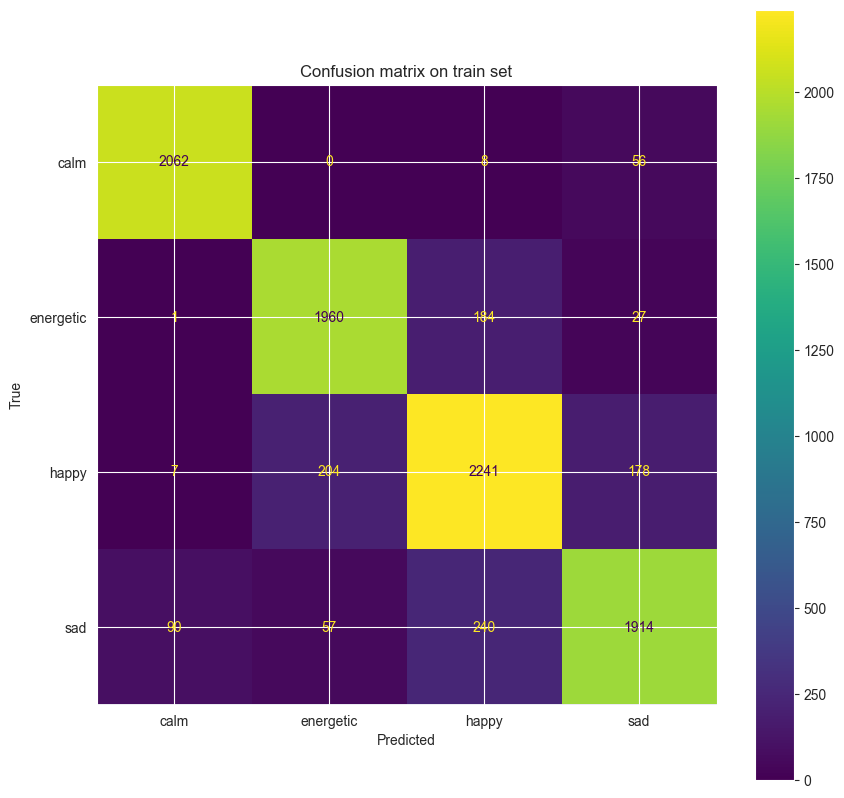

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=emotions)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
disp.ax_.set_title("Confusion matrix on train set")
disp.ax_.set(xlabel='Predicted', ylabel='True')
plt.show()

In [128]:
#########################################################################################################

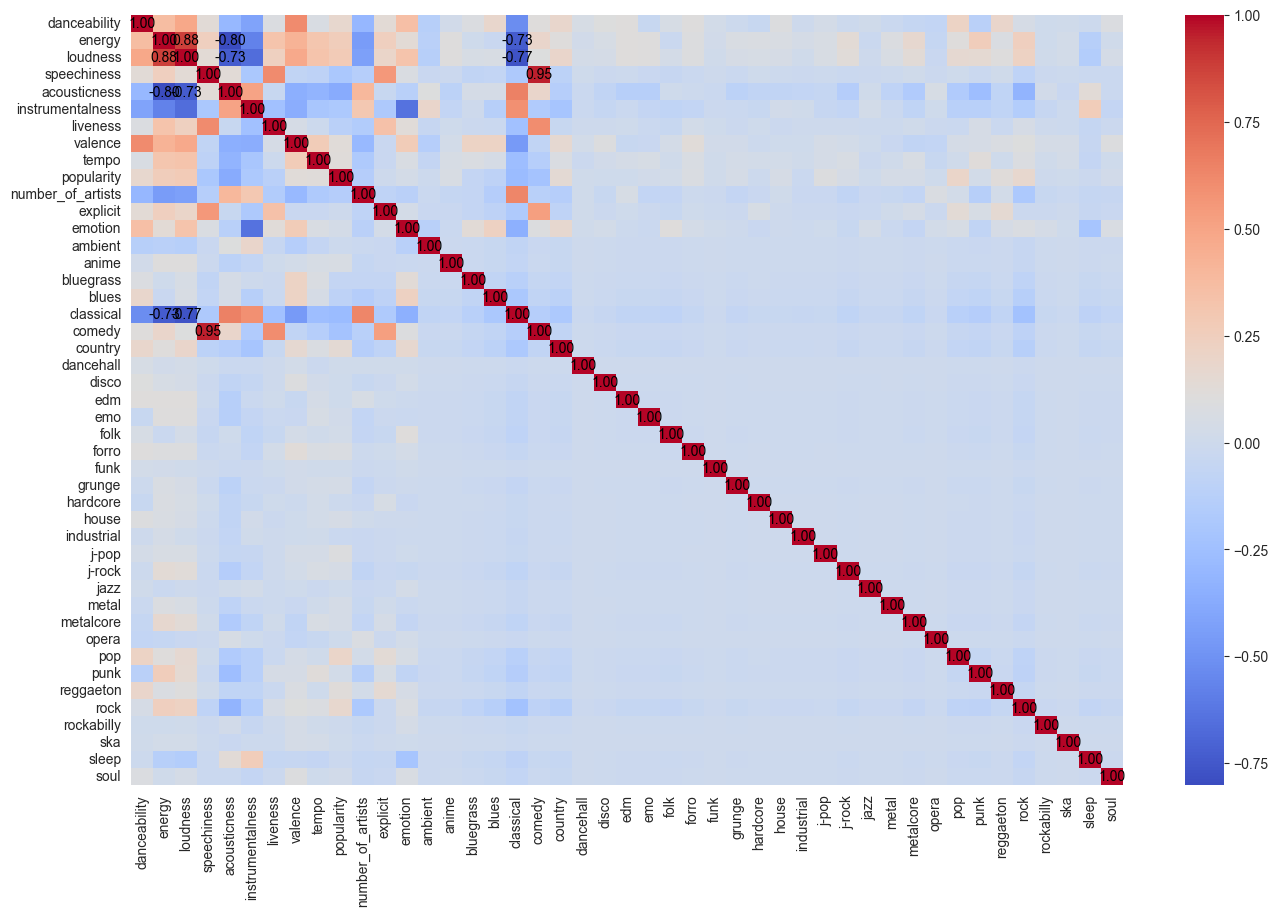

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,...,metalcore,opera,pop,punk,reggaeton,rock,rockabilly,ska,sleep,soul
danceability,1.000000,0.369713,0.482431,0.128093,-0.301221,-0.416533,0.078950,0.612894,0.067461,0.173959,...,-0.049127,-0.067545,0.215237,-0.116810,0.185053,0.049450,0.007837,0.011918,-0.009092,0.085561
energy,0.369713,1.000000,0.875673,0.246829,-0.800644,-0.573850,0.328588,0.428362,0.316893,0.255310,...,0.165453,-0.050484,0.107999,0.255685,0.075893,0.245419,0.004316,0.028456,-0.128670,0.014454
loudness,0.482431,0.875673,1.000000,0.138800,-0.733666,-0.661559,0.235352,0.476828,0.325656,0.276122,...,0.132902,-0.027815,0.159061,0.153476,0.101268,0.225031,0.014087,0.027997,-0.147151,0.041725
speechiness,0.128093,0.246829,0.138800,1.000000,0.127888,-0.189987,0.609699,-0.075115,-0.095388,-0.192919,...,0.011627,-0.016537,0.001966,-0.020577,0.015127,-0.086759,-0.016576,-0.006609,-0.020689,-0.025606
acousticness,-0.301221,-0.800644,-0.733666,0.127888,1.000000,0.503965,-0.040437,-0.354773,-0.327238,-0.371688,...,-0.162235,0.057370,-0.164565,-0.259731,-0.079041,-0.328533,0.016140,-0.030643,0.128201,-0.022652
instrumentalness,-0.416533,-0.573850,-0.661559,-0.189987,0.503965,1.000000,-0.242833,-0.364545,-0.207625,-0.184559,...,-0.076902,0.004542,-0.120025,-0.119210,-0.082582,-0.151914,-0.041645,-0.012522,0.265818,-0.061493
liveness,0.078950,0.328588,0.235352,0.609699,-0.040437,-0.242833,1.000000,0.046632,-0.005909,-0.113741,...,0.008266,-0.015754,-0.025753,0.049835,-0.025298,0.043567,-0.001037,-0.009146,-0.051496,-0.014056
valence,0.612894,0.428362,0.476828,-0.075115,-0.354773,-0.364545,0.046632,1.000000,0.269973,0.126086,...,-0.069585,-0.066392,0.040896,0.045329,0.071962,0.099215,0.039401,0.038852,-0.046838,0.087923
tempo,0.067461,0.316893,0.325656,-0.095388,-0.327238,-0.207625,-0.005909,0.269973,1.000000,0.116162,...,0.057751,-0.035429,0.013093,0.115787,0.008140,0.084035,0.012250,0.034093,-0.056096,0.001962
popularity,0.173959,0.255310,0.276122,-0.192919,-0.371688,-0.184559,-0.113741,0.126086,0.116162,1.000000,...,0.036557,0.002273,0.193923,0.027718,0.119889,0.176934,-0.005356,0.001809,-0.013968,0.020358


In [129]:
# EDA
corr_matrix = df_ohwd.corr() #musel som dat dataset po labelencodeingu lebo .corr() nevie narabat so stringom 
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# Odstránenie hodnôt z konkrétnych políčok
annot_koeficient = corr_matrix[(corr_matrix >= 0.7) | (corr_matrix <= -0.7)]  # vyberie hodnoty, ktoré chcete ponechať
for i in range(annot_koeficient.shape[0]):
    for j in range(annot_koeficient.shape[1]):
        if pd.notna(annot_koeficient.iat[i, j]):
            plt.text(j + 0.5, i + 0.5, f"{annot_koeficient.iat[i, j]:.2f}", fontsize=10, ha='center', va='center', color='black')

plt.show()

corr_matrix

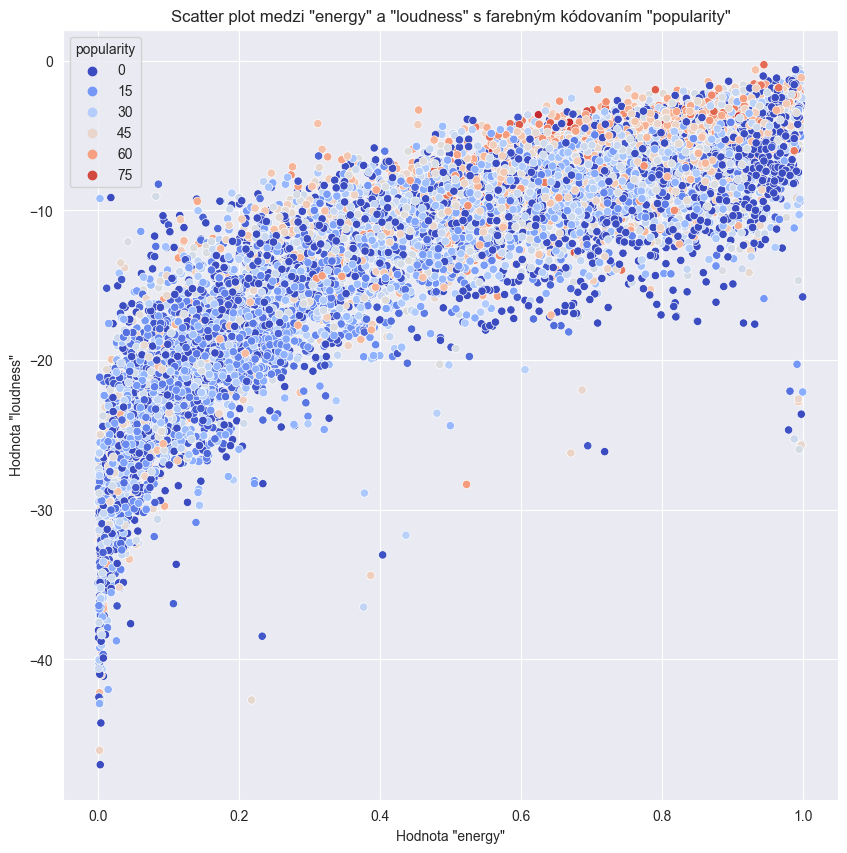

In [130]:
# Zobrazte scatter plot pre stĺpce "energy" a "loudness" s farebným kódovaním podľa "popularity"
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_ohwd, x='energy', y='loudness', hue='popularity', palette='coolwarm')
plt.title('Scatter plot medzi "energy" a "loudness" s farebným kódovaním "popularity"')
plt.xlabel('Hodnota "energy"')
plt.ylabel('Hodnota "loudness"')
plt.show()

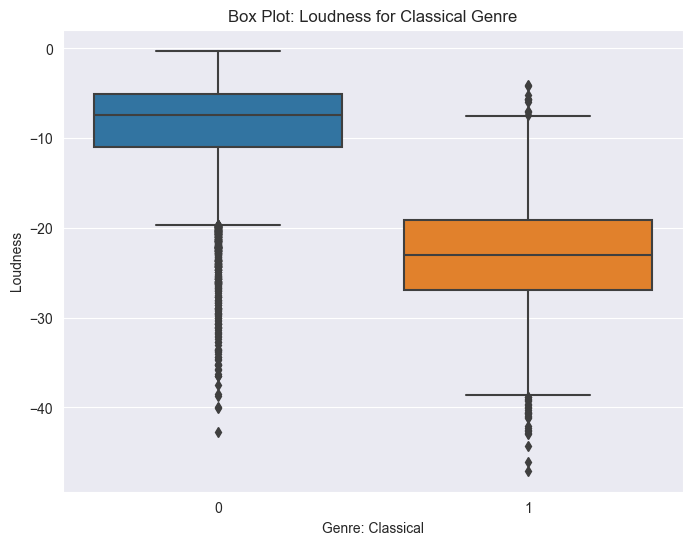

In [131]:
# Vytvorenie box plotu
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_ohwd, x="classical", y="loudness")

# Pridajte popis osí a názov grafu
plt.xlabel("Genre: Classical")
plt.ylabel("Loudness")
plt.title("Box Plot: Loudness for Classical Genre")

# Zobrazenie grafu
plt.show()

<Axes: xlabel='explicit', ylabel='danceability'>

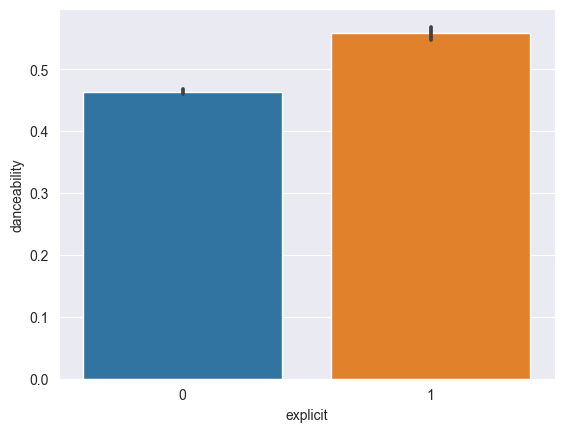

In [132]:
sns.barplot(x='explicit', y='danceability',data=df_ohwd)

array([[<Axes: xlabel='valence', ylabel='valence'>,
        <Axes: xlabel='explicit', ylabel='valence'>,
        <Axes: xlabel='danceability', ylabel='valence'>,
        <Axes: xlabel='speechiness', ylabel='valence'>],
       [<Axes: xlabel='valence', ylabel='explicit'>,
        <Axes: xlabel='explicit', ylabel='explicit'>,
        <Axes: xlabel='danceability', ylabel='explicit'>,
        <Axes: xlabel='speechiness', ylabel='explicit'>],
       [<Axes: xlabel='valence', ylabel='danceability'>,
        <Axes: xlabel='explicit', ylabel='danceability'>,
        <Axes: xlabel='danceability', ylabel='danceability'>,
        <Axes: xlabel='speechiness', ylabel='danceability'>],
       [<Axes: xlabel='valence', ylabel='speechiness'>,
        <Axes: xlabel='explicit', ylabel='speechiness'>,
        <Axes: xlabel='danceability', ylabel='speechiness'>,
        <Axes: xlabel='speechiness', ylabel='speechiness'>]], dtype=object)

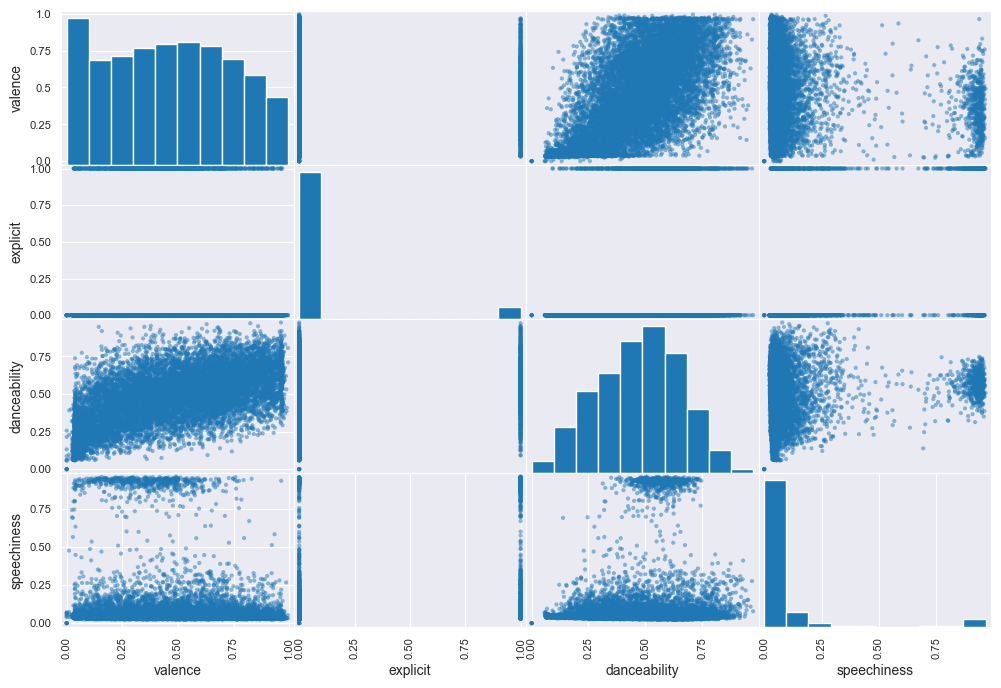

In [133]:
from pandas.plotting import scatter_matrix
features = ["valence", "explicit", "danceability", "speechiness"]
scatter_matrix(df_ohwd[features], figsize=(12, 8))

In [134]:
###################################################################################################################################

In [135]:
# Natrenovanie euronovej siet
from keras.src.optimizers import Adam

#One-Hot encodeing emotion
df_ohwd = pd.get_dummies(df_without_specified_columns, columns=['top_genre'], prefix='', prefix_sep='')

for i in temp:
    df_ohwd[i] = df_ohwd[i].astype(int)
    
df_ohwd

# Krok 4: Rozdelenie datasetu
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, shuffle=True, test_size=0.5, random_state=42)

# Krok 5: Normalizácia dát
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Krok 6-7: Vytvorenie a kompilácia modelu
model = Sequential()
model.add(Dense(24, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Pre klasifikáciu namiesto 1 môžete použiť počet tried

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00000000000002), metrics=['accuracy'])

# Krok 8: Trénovanie modelu
history = model.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=32)

# Krok 9: Evaluácia modelu
test_scores = model.evaluate(X_test, y_test, verbose=0)
print("*"*100, "Test accuracy", "*"*100)
print(f"Test accuracy: {test_scores[1]:.4f}")

# Krok 10: Vytvorenie a zobrazenie matice zámiešania
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)  # Treshold pre binárne klasifikátory

class_names = df['emotion'].unique().tolist()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
disp.ax_.set_title("Confusion matrix on test set")
disp.ax_.set(xlabel='Predicted', ylabel='True')
plt.show()

# Krok 11: Zobrazenie kriviek straty a presnosti
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'tensorflow'